<center>
<img src="https://benefits.fastfive.co.kr/wp-content/uploads/2017/12/logo_%ED%8C%A8%EC%8A%A4%ED%8A%B8%EC%BA%A0%ED%8D%BC%EC%8A%A4-600x500.png" width="300" height="300"><br>
</center>

파이썬을 활용한 이커머스 데이터분석_강의를 듣고 따라했던 코딩과 요점을 정리하였다.
 - 출처: [fast campus](https://fastcampus.co.kr/?gclid=CjwKCAjwqvyFBhB7EiwAER786a4FhRzvL9JiiOOTS5TL22ZuXVUKWvF6wWni06h-6fIZ5tp1j0J5phoCoHMQAvD_BwE)




# Chapter.09 상품 리뷰 분석 (NLP)

## 분석의 목적


- Word Cloud를 통해 중요 단어 확인
- Naive Bayses 모델을 통해 리뷰의 별점 예측
- Data: Yelp Review

In [1]:
#!pip3 install nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./data/yelp.csv', index_col = 0)  #index_col = 0 0번째 컬럼을 인덱스러 넣는다.

In [4]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


우리가 살펴볼 컬럼은 stars [별점,총평] 과 text 이다. 나머지는 drop or 영향이 있나 없나 살펴볼정도 이다.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2967245 to 838267
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    10000 non-null  object
 1   user_id      10000 non-null  object
 2   business_id  10000 non-null  object
 3   stars        10000 non-null  int64 
 4   date         10000 non-null  object
 5   text         10000 non-null  object
 6   useful       10000 non-null  int64 
 7   funny        10000 non-null  int64 
 8   cool         10000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 781.2+ KB


결측치는 없는 것으로 확인된다. 총 10000개 이고, Dtype를 살펴본다.

In [6]:
data.describe()

,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.012800,1.498800,0.464200,0.542500
std,1.724684,6.339355,1.926523,2.010273
min,1.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,0.000000
max,5.000000,533.000000,83.000000,97.000000


.describe() 함수는 text or object는 불러오지 않는다. 즉 숫자 데이터만 가지고 온다.

max를 보면 유난히 숫자가 크다. 아마 아웃라이너 데이터로 추정이 된다. 그리고 불필요한 컬럼들을 drop 해보자.

In [7]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [8]:
data.drop(['review_id','user_id','business_id','date'],axis=1, inplace = True)

axis = 1 과 inplace = True 를 해주어야 함을 기억하자. inplace = True 는 저장을 해준다.

In [9]:
data.head()

,stars,text,useful,funny,cool
2967245,5,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,5,This has become our go-to sushi place. The sus...,0,0,0
1139855,1,I was very disappointed with the hotel. The re...,2,1,1
3997153,5,Love this place - super amazing - staff here i...,0,0,0
4262000,5,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [10]:
data.iloc[0]['text']

'LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.'

In [11]:
data.iloc[0]

stars                                                     5
text      LOVE the cheeses here.  They are worth the pri...
useful                                                    0
funny                                                     0
cool                                                      1
Name: 2967245, dtype: object

In [12]:
len(data.iloc[0]['text'])

347

In [13]:
data['text'].apply(len)

2967245     347
4773684     377
1139855     663
3997153     141
4262000     455
           ... 
1567641     779
4910763     268
1036315    1288
555962     1160
838267      137
Name: text, Length: 10000, dtype: int64

각각의 관측치가 몇개의 텍스트가 있는지 확인 할 수 있다. 

이것을 data['text_length'] = data['text'].apply(len) 으로 할당한다.

In [14]:
 data['text_length'] = data['text'].apply(len)

In [15]:
data.head()

,stars,text,useful,funny,cool,text_length
2967245,5,LOVE the cheeses here. They are worth the pri...,0,0,1,347
4773684,5,This has become our go-to sushi place. The sus...,0,0,0,377
1139855,1,I was very disappointed with the hotel. The re...,2,1,1,663
3997153,5,Love this place - super amazing - staff here i...,0,0,0,141
4262000,5,Thank you Dana!!!! Having dyed my hair black p...,0,0,0,455


text_length 의 컬럼이 하나 더 추가됨을 확인 할 수 있다.

stars (별점)을 확인해 보자.

In [16]:
data['stars'].value_counts()

5    7532
1    2468
Name: stars, dtype: int64

5점과 1점 만이 있음을 확인할 수 있고, 갯수는 확인이 가능하다. 이것을 그래프로 나타내 보자.

/home/ubuntu/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stars', ylabel='count'>

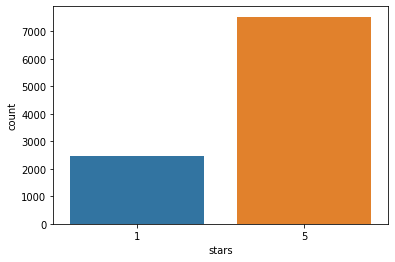

In [17]:
sns.countplot(data['stars'])

다음에는, text_length의 분포를 살펴보자.

/home/ubuntu/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text_length', ylabel='Density'>

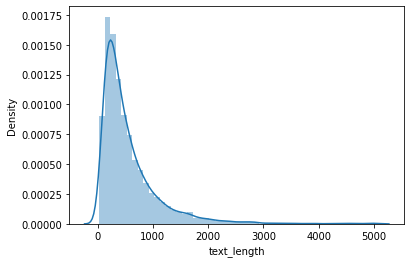

In [18]:
sns.distplot(data['text_length'])

0 ~ 1000개 사이가 가장 많음을 확인 할 수 있다. 

In [19]:
data.corr()

,stars,useful,funny,cool,text_length
stars,1.000000,-0.098825,-0.089860,0.060101,-0.221752
useful,-0.098825,1.000000,0.656630,0.525962,0.161592
funny,-0.089860,0.656630,1.000000,0.741797,0.215003
cool,0.060101,0.525962,0.741797,1.000000,0.193500
text_length,-0.221752,0.161592,0.215003,0.193500,1.000000


<AxesSubplot:>

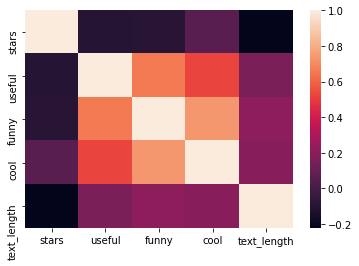

In [20]:
sns.heatmap(data.corr())

<AxesSubplot:>

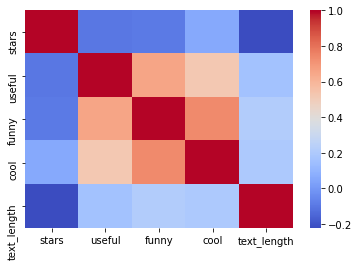

In [21]:
sns.heatmap(data.corr(), cmap = 'coolwarm')

## 1. Word Cloud를 통해 중요 단어 확인 하기

In [22]:
data['text']

2967245    LOVE the cheeses here.  They are worth the pri...
4773684    This has become our go-to sushi place. The sus...
1139855    I was very disappointed with the hotel. The re...
3997153    Love this place - super amazing - staff here i...
4262000    Thank you Dana!!!! Having dyed my hair black p...
                                 ...                        
1567641    I'm a sucker for places like this. Get me in f...
4910763    Extremely rude staff!  Was told 4 min on a lar...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer, then look no...
838267     Awesome food. Awesome beer. Awesome service. N...
Name: text, Length: 10000, dtype: object

Word Cloud를 할때, 느낌표(!) 와 같은 불필요한 text를 제거하는 방법을 알아보자.

In [23]:
import string

In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
data.iloc[0]['text']  # text의 첫번째 열을 가지고 온다.

'LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.'

In [26]:
s = data.iloc[0]['text']  # s 라는 이름으로 할당하기

In [27]:
for i in s:
    print(i)

L
O
V
E
 
t
h
e
 
c
h
e
e
s
e
s
 
h
e
r
e
.
 
 
T
h
e
y
 
a
r
e
 
w
o
r
t
h
 
t
h
e
 
p
r
i
c
e
.
 
 
G
r
e
a
t
 
f
o
r
 
f
i
n
d
i
n
g
 
t
r
e
a
t
s
 
f
o
r
 
a
 
s
p
e
c
i
a
l
 
d
i
n
n
e
r
 
o
r
 
p
i
c
n
i
c
.
 
 
N
i
c
e
 
o
n
 
s
a
m
p
l
e
 
d
a
y
s
.
 
Y
u
m
!
!
!
 
T
o
p
 
q
u
a
l
i
t
y
 
m
e
a
t
s
.
 
N
i
c
e
 
s
e
l
e
c
t
i
o
n
 
o
f
 
n
o
n
 
b
r
a
n
d
 
f
r
o
z
e
n
 
v
e
g
g
i
e
s
.
 
 
V
e
g
g
i
e
 
c
h
i
p
s
 
a
r
e
 
m
e
g
a
 
t
a
s
t
y
.
 
 
A
l
w
a
y
s
 
q
u
i
c
k
 
a
n
d
 
f
r
i
e
n
d
l
y
 
c
h
e
c
k
 
o
u
t
.
 
 
P
r
o
d
u
c
e
 
n
o
t
 
a
s
 
s
t
e
l
l
a
r
 
a
s
 
i
t
 
o
n
c
e
 
w
a
s
,
 
b
u
t
 
a
l
s
o
 
n
o
t
 
f
i
n
d
i
n
g
 
b
e
t
t
e
r
 
i
n
 
M
a
d
i
s
o
n
.


for 루프를 사용해서 나타내 보았다. 특수문자,부호를 제거하고, 글자를 붙이기 위해 다음의 과정을 실행한다.

In [28]:
new_s = []
for i in s:
        if i not in string.punctuation:
            new_s.append(i)

In [29]:
new_s

['L',
 'O',
 'V',
 'E',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'c',
 'h',
 'e',
 'e',
 's',
 'e',
 's',
 ' ',
 'h',
 'e',
 'r',
 'e',
 ' ',
 ' ',
 'T',
 'h',
 'e',
 'y',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'w',
 'o',
 'r',
 't',
 'h',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'p',
 'r',
 'i',
 'c',
 'e',
 ' ',
 ' ',
 'G',
 'r',
 'e',
 'a',
 't',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 'f',
 'i',
 'n',
 'd',
 'i',
 'n',
 'g',
 ' ',
 't',
 'r',
 'e',
 'a',
 't',
 's',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 'a',
 ' ',
 's',
 'p',
 'e',
 'c',
 'i',
 'a',
 'l',
 ' ',
 'd',
 'i',
 'n',
 'n',
 'e',
 'r',
 ' ',
 'o',
 'r',
 ' ',
 'p',
 'i',
 'c',
 'n',
 'i',
 'c',
 ' ',
 ' ',
 'N',
 'i',
 'c',
 'e',
 ' ',
 'o',
 'n',
 ' ',
 's',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'd',
 'a',
 'y',
 's',
 ' ',
 'Y',
 'u',
 'm',
 ' ',
 'T',
 'o',
 'p',
 ' ',
 'q',
 'u',
 'a',
 'l',
 'i',
 't',
 'y',
 ' ',
 'm',
 'e',
 'a',
 't',
 's',
 ' ',
 'N',
 'i',
 'c',
 'e',
 ' ',
 's',
 'e',
 'l',
 'e',
 'c',
 't',
 'i',
 'o',
 'n',
 ' ',
 'o',
 'f',
 ' ',
 'n'

In [30]:
''.join(new_s)

'LOVE the cheeses here  They are worth the price  Great for finding treats for a special dinner or picnic  Nice on sample days Yum Top quality meats Nice selection of non brand frozen veggies  Veggie chips are mega tasty  Always quick and friendly check out  Produce not as stellar as it once was but also not finding better in Madison'

위 과정을 펑션으로 만들어 놓자.

In [31]:
# 펑션으로 만들기
def remove_punc(x):
    new_s = []
    for i in x:
        if i not in string.punctuation:
            new_s.append(i)
    new_s = ''.join(new_s)
    return new_s

In [32]:
data['text'].apply(remove_punc)

2967245    LOVE the cheeses here  They are worth the pric...
4773684    This has become our goto sushi place The sushi...
1139855    I was very disappointed with the hotel The res...
3997153    Love this place  super amazing  staff here is ...
4262000    Thank you Dana Having dyed my hair black previ...
                                 ...                        
1567641    Im a sucker for places like this Get me in fro...
4910763    Extremely rude staff  Was told 4 min on a larg...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer then look no ...
838267     Awesome food Awesome beer Awesome service Need...
Name: text, Length: 10000, dtype: object

한 줄로 할 수 있는 방법도 알아보겠다. (펑션만드는 방법 말고)

In [33]:
''.join([i for i in s if i not in string.punctuation])

'LOVE the cheeses here  They are worth the price  Great for finding treats for a special dinner or picnic  Nice on sample days Yum Top quality meats Nice selection of non brand frozen veggies  Veggie chips are mega tasty  Always quick and friendly check out  Produce not as stellar as it once was but also not finding better in Madison'

데이터 프레임 전체에 하기 위해서는 다음의 방법을 적용한다.

In [34]:
data['text'].apply(lambda x: ''.join([i for i in s if i not in string.punctuation]))

2967245    LOVE the cheeses here  They are worth the pric...
4773684    LOVE the cheeses here  They are worth the pric...
1139855    LOVE the cheeses here  They are worth the pric...
3997153    LOVE the cheeses here  They are worth the pric...
4262000    LOVE the cheeses here  They are worth the pric...
                                 ...                        
1567641    LOVE the cheeses here  They are worth the pric...
4910763    LOVE the cheeses here  They are worth the pric...
1036315    LOVE the cheeses here  They are worth the pric...
555962     LOVE the cheeses here  They are worth the pric...
838267     LOVE the cheeses here  They are worth the pric...
Name: text, Length: 10000, dtype: object

할당해주기

In [35]:
data['text'] = data['text'].apply(lambda x: ''.join([i for i in s if i not in string.punctuation]))

In [36]:
data.head()

,stars,text,useful,funny,cool,text_length
2967245,5,LOVE the cheeses here They are worth the pric...,0,0,1,347
4773684,5,LOVE the cheeses here They are worth the pric...,0,0,0,377
1139855,1,LOVE the cheeses here They are worth the pric...,2,1,1,663
3997153,5,LOVE the cheeses here They are worth the pric...,0,0,0,141
4262000,5,LOVE the cheeses here They are worth the pric...,0,0,0,455


이 과정을 함으로써 text 컬럼에서 불필요한 기호는 drop된 모습을 확인 할 수 있다.

In [37]:
from nltk.corpus import stopwords

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
data['text']

2967245    LOVE the cheeses here  They are worth the pric...
4773684    LOVE the cheeses here  They are worth the pric...
1139855    LOVE the cheeses here  They are worth the pric...
3997153    LOVE the cheeses here  They are worth the pric...
4262000    LOVE the cheeses here  They are worth the pric...
                                 ...                        
1567641    LOVE the cheeses here  They are worth the pric...
4910763    LOVE the cheeses here  They are worth the pric...
1036315    LOVE the cheeses here  They are worth the pric...
555962     LOVE the cheeses here  They are worth the pric...
838267     LOVE the cheeses here  They are worth the pric...
Name: text, Length: 10000, dtype: object

In [41]:
s.split()  #띄어쓰기 기준으로 분류하기

['LOVE',
 'the',
 'cheeses',
 'here.',
 'They',
 'are',
 'worth',
 'the',
 'price.',
 'Great',
 'for',
 'finding',
 'treats',
 'for',
 'a',
 'special',
 'dinner',
 'or',
 'picnic.',
 'Nice',
 'on',
 'sample',
 'days.',
 'Yum!!!',
 'Top',
 'quality',
 'meats.',
 'Nice',
 'selection',
 'of',
 'non',
 'brand',
 'frozen',
 'veggies.',
 'Veggie',
 'chips',
 'are',
 'mega',
 'tasty.',
 'Always',
 'quick',
 'and',
 'friendly',
 'check',
 'out.',
 'Produce',
 'not',
 'as',
 'stellar',
 'as',
 'it',
 'once',
 'was,',
 'but',
 'also',
 'not',
 'finding',
 'better',
 'in',
 'Madison.']

In [42]:
s.lower() # 소문자로 나타내기

'love the cheeses here.  they are worth the price.  great for finding treats for a special dinner or picnic.  nice on sample days. yum!!! top quality meats. nice selection of non brand frozen veggies.  veggie chips are mega tasty.  always quick and friendly check out.  produce not as stellar as it once was, but also not finding better in madison.'

필터링하기

In [43]:
def stop_w(x):
    

    new_s = []

    for i in s.split():
        if i.lower() not in stopwords.words('english'):
            new_s.append(i.lower())
    return new_s

In [44]:
data['text'].apply(stop_w)

2967245    [love, cheeses, here., worth, price., great, f...
4773684    [love, cheeses, here., worth, price., great, f...
1139855    [love, cheeses, here., worth, price., great, f...
3997153    [love, cheeses, here., worth, price., great, f...
4262000    [love, cheeses, here., worth, price., great, f...
                                 ...                        
1567641    [love, cheeses, here., worth, price., great, f...
4910763    [love, cheeses, here., worth, price., great, f...
1036315    [love, cheeses, here., worth, price., great, f...
555962     [love, cheeses, here., worth, price., great, f...
838267     [love, cheeses, here., worth, price., great, f...
Name: text, Length: 10000, dtype: object

In [45]:
[i.lower() for i in s.split() if i.lower() not in stopwords.words('english')]

['love',
 'cheeses',
 'here.',
 'worth',
 'price.',
 'great',
 'finding',
 'treats',
 'special',
 'dinner',
 'picnic.',
 'nice',
 'sample',
 'days.',
 'yum!!!',
 'top',
 'quality',
 'meats.',
 'nice',
 'selection',
 'non',
 'brand',
 'frozen',
 'veggies.',
 'veggie',
 'chips',
 'mega',
 'tasty.',
 'always',
 'quick',
 'friendly',
 'check',
 'out.',
 'produce',
 'stellar',
 'was,',
 'also',
 'finding',
 'better',
 'madison.']

리스트 안에 우리가 필요한 단어들만 정리가 된 모습을 확인 할 수 있다.

In [46]:
# data['text']로 할당하기

data['text'] = data['text'].apply(lambda x:[i.lower() for i in x.split() if i.lower() not in stopwords.words('english')] )

In [47]:
data.head()

,stars,text,useful,funny,cool,text_length
2967245,5,"[love, cheeses, worth, price, great, finding, ...",0,0,1,347
4773684,5,"[love, cheeses, worth, price, great, finding, ...",0,0,0,377
1139855,1,"[love, cheeses, worth, price, great, finding, ...",2,1,1,663
3997153,5,"[love, cheeses, worth, price, great, finding, ...",0,0,0,141
4262000,5,"[love, cheeses, worth, price, great, finding, ...",0,0,0,455


text 컬럼에 원하는 대로 단어형태의 리스트로 들어옴을 확인 했다.

In [48]:
# 이중 for문

word_split = []

for i in range(len(data)):
    for j in data.iloc[i]['text']:
        word_split.append(j)

In [49]:
len(word_split)

370000

In [50]:
from nltk.probability import FreqDist

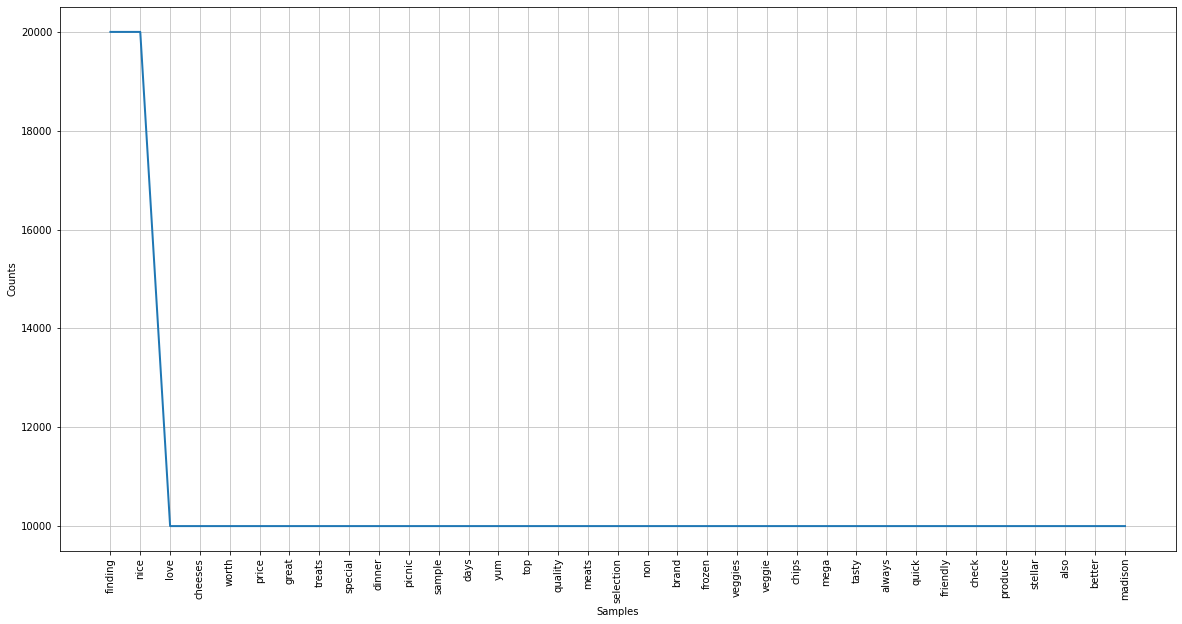

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [51]:
plt.figure(figsize= (20,10))
FreqDist(word_split).plot(50)

wordcloud 만들기

In [52]:
#!pip3 install wordcloud

In [53]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

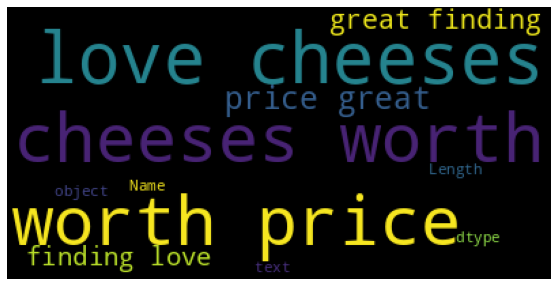

In [57]:
wc = WordCloud().generate(str(data['text']))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off') #  x 축 y축의 숫자는 지우기

여기에서, plot 와 wordcloud는 완벽하게 일치하지 않는다. 이유는 wordcloud 안에 내장되어있는 함수가 있어 또 걸러주기 때문이다.

In [58]:
data['stars'].value_counts()

5    7532
1    2468
Name: stars, dtype: int64

이제 별점 5점 짜리와, 별점 1점짜리를 나누어서 wordcloud를 나누어서 만들어 보자.

In [62]:
data[data['stars'] == 5]

,stars,text,useful,funny,cool,text_length
2967245,5,"[love, cheeses, worth, price, great, finding, ...",0,0,1,347
4773684,5,"[love, cheeses, worth, price, great, finding, ...",0,0,0,377
3997153,5,"[love, cheeses, worth, price, great, finding, ...",0,0,0,141
4262000,5,"[love, cheeses, worth, price, great, finding, ...",0,0,0,455
1272104,5,"[love, cheeses, worth, price, great, finding, ...",0,0,0,387
...,...,...,...,...,...,...
4415064,5,"[love, cheeses, worth, price, great, finding, ...",0,0,0,143
1567641,5,"[love, cheeses, worth, price, great, finding, ...",3,1,3,779
1036315,5,"[love, cheeses, worth, price, great, finding, ...",1,0,0,1288
555962,5,"[love, cheeses, worth, price, great, finding, ...",0,0,0,1160


In [66]:
good = data[data['stars'] == 5]['text']  # 별점 5점짜리만 필터링해서 나타내기
bad = data[data['stars'] == 1]['text'] # 별점 1점짜리만 필터링해서 나타내기

(-0.5, 399.5, 199.5, -0.5)

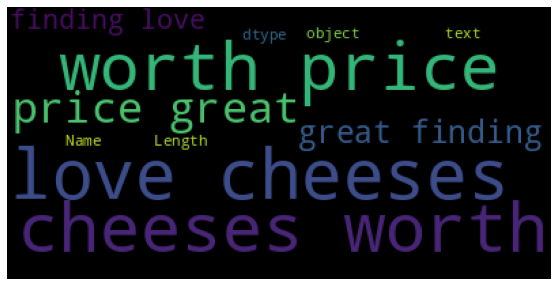

In [69]:
# 별점 5점짜리 wordcloud
wc = WordCloud().generate(str(good))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off') #  x 축 y축의 숫자는 지우기

(-0.5, 399.5, 199.5, -0.5)

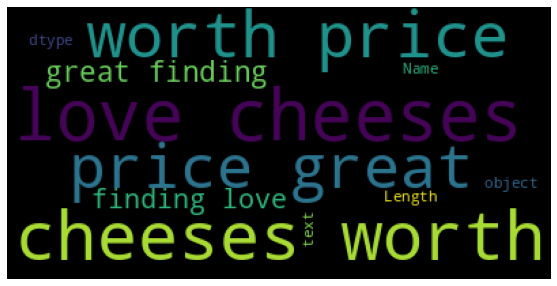

In [70]:
# 별점 1점짜리 wordcloud
wc = WordCloud().generate(str(bad))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off') #  x 축 y축의 숫자는 지우기

## 2.Naive Bayses 모델을 통해 리뷰의 별점 예측

In [71]:
import pandas as pd
import numpy as np


In [72]:
data = pd.read_csv('./data/yelp.csv', index_col = 0 )

In [74]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [75]:
X = data['text']
y = data['stars']

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
cv = CountVectorizer()

In [78]:
cv.fit(X)

CountVectorizer()

In [80]:
X = cv.transform(X)

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 100)

In [92]:
from sklearn.naive_bayes import MultinomialNB

In [94]:
model = MultinomialNB()

In [95]:
model.fit(X_train, y_train)

MultinomialNB()

In [96]:
pred = model.predict(X_test)

In [97]:
pred

array([5, 5, 5, ..., 1, 5, 1])

In [98]:
y_test

1373705    5
3128713    5
212088     1
1622136    5
2380124    5
          ..
3548316    5
38943      5
2423674    1
1564863    5
3629333    1
Name: stars, Length: 2000, dtype: int64

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [101]:
accuracy_score(y_test, pred)

0.9265

In [102]:
confusion_matrix(y_test, pred)

array([[ 421,   65],
       [  82, 1432]])

In [104]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.84      0.87      0.85       486
           5       0.96      0.95      0.95      1514

    accuracy                           0.93      2000
   macro avg       0.90      0.91      0.90      2000
weighted avg       0.93      0.93      0.93      2000



랜덤포레스트와 비교하기

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf = RandomForestClassifier(max_depth = 10, n_estimators = 1000)

In [115]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [116]:
pred2 = rf.predict(X_test)

In [119]:
accuracy_score(y_test, pred2)

0.787

In [120]:
confusion_matrix(y_test, pred2)

array([[  62,  424],
       [   2, 1512]])

In [121]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           1       0.97      0.13      0.23       486
           5       0.78      1.00      0.88      1514

    accuracy                           0.79      2000
   macro avg       0.87      0.56      0.55      2000
weighted avg       0.83      0.79      0.72      2000



 NLP 텍스트 관련해서는 랜덤포레스트보다, Naive Bayses 모델이 더 좋은 성능과 시간적 효율이 좋다는 것을 알 수 있었다.

- 출처:파이썬을 활용한 이커머스 데이터 분석